In [6]:
from papilion import PapilionDataset
import numpy as np
from torch.utils.data import DataLoader
from torchvision import transforms

In [7]:
pap = PapilionDataset(
    root="~/data", train=True)

Dataset files present and verified


In [9]:
paptest = PapilionDataset(
    root="~/data", train=False)

Dataset files present and verified


In [10]:
print(len(pap.class_names))
print(len(set(pap.targets)))

print(pap.class_names[0])
print(pap.targets[0])

print(len(pap.data))
print(len(paptest.data))

112
112
Papilionidae-Papilio-fuscus-thomsonii
105
5522
2721


In [12]:
from torch.utils.data import Subset
from sklearn.model_selection import StratifiedShuffleSplit

trainset = pap

validation_set_fraction = 0.1
sss = StratifiedShuffleSplit(n_splits=1, test_size=validation_set_fraction)
for train_index, val_index in sss.split(trainset.data, trainset.targets):
    trainset, valset = Subset(trainset, train_index), Subset(trainset, val_index)
    break

print(len(trainset))
print(len(valset))

4969
553


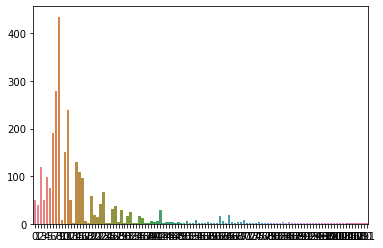

In [16]:
# show the first 9 images in the test set in a 3x3 grid
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


def show_images(images, labels):
    fig = plt.figure(figsize=(12, 12))
    for i in range(9):
        ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
        ax.imshow(images[i], cmap="gray")
        ax.set_title(labels[i])
        ax.set_axis_off()
    plt.show()


# show class distribution in the testset using a bar plot
class_counts = Counter(paptest.targets)
sns.barplot(
    x=list(range(len(class_counts))),
    y=list(class_counts.values()),
    palette="husl",
    orient="v",
)
plt.show()


In [13]:
pap._train_data[0].shape
# calculate the mean image resolution of the trainig images
res = []
for img in pap._train_data:
    res.append(img.shape)
print("train data mean resolution: ", np.mean(res, axis=0))

train data mean resolution: {} w by {} h  [531.84154292 570.98478812   3.        ]


Dataset files present and verified


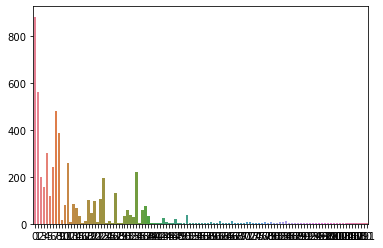

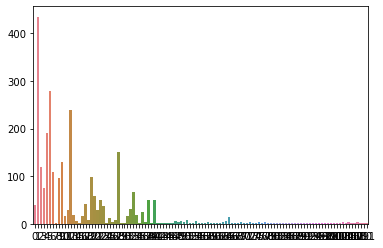

train data mean resolution:  nan  test data mean resolution:  nan


/Users/daan/miniforge3/envs/DatasetReduction/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/daan/miniforge3/envs/DatasetReduction/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [5]:
normalize = transforms.Normalize(
                (0.485, 0.456, 0.406), (0.229, 0.224, 0.225)
            )

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    normalize
])

pap_train = PapilionDataset(
    root="~/data", train=True, transform=transform)
image_data_loader = DataLoader(
    pap_train,
    # batch size is whole dataset
    batch_size=len(pap_train),
    shuffle=False,
    num_workers=0)


In [6]:
# calculating normalization parameters

images, _ = next(iter(image_data_loader))
# images = images.numpy()
print(images.shape)
# shape of images = [b,c,w,h]
mean, std = images.mean([0, 2, 3]), images.std([0, 2, 3])

torch.Size([5522, 3, 224, 224])


In [7]:
print(mean, std)

tensor([0.6209, 0.6052, 0.5562]) tensor([0.2183, 0.2803, 0.3155])


In [13]:
print('num classes in pap_train._train_labels: ', len(set(pap_train._train_labels)))

num classes in pap_train._train_labels:  112
